**Name : Zahra Readymadewala**

**Reg No.: 22MCS0007**

**Data Analytics Theory Assignment**

**Objective:**
The DA1 should containts the following documentation
1. Find the dataset link and implement the same using Python code (Cleaning, Feature Selection, Feature Elimination, Root node Selection, Model Building and Visualization)
2. Document to be uploaded in VTop 1) Objective 2) Dataset Link 3) Description of your work 4) Word document containing Implementation, Visualization of (Precision, Recall, F1 Score, Accuracy, TPR, FPR, RoC curve) 5) Conclusion


**Import necessary Library**

In [ ]:
import pandas as pd
import numpy as np
import csv


**Load dataset : Mushroom**

In [ ]:
df = pd.read_csv('Mushroom.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


**Describe the dataset : Mushroom**

In [ ]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


**Information of the given dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
df['class'].value_counts().to_frame()

,class
e,4208
p,3916


**Cleaning dataset**

**Printing the coloumn which has missing values**

In [ ]:
print(df["stalk-root"])

0       e
1       c
2       c
3       e
4       e
       ..
8119    ?
8120    ?
8121    ?
8122    ?
8123    ?
Name: stalk-root, Length: 8124, dtype: object


**Replacing the '?' with Nan**

In [ ]:
df["stalk-root"].replace("?", np.nan, inplace=True)

**Count of number of Null Values**

In [ ]:
null_values = df["stalk-root"].isnull().sum()

# Display the count of null values for each attribute
print("Null Value Counts:")
print(null_values)

Null Value Counts:
2480


**Replacing the Nan values with the mod value.**

In [ ]:
df['stalk-root'] = df['stalk-root'].fillna(df['stalk-root'].mode()[0])
df['stalk-root'].isnull().sum()

0

**Encoding data using Label Encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder
Encoder_df = LabelEncoder() 
for col in df.columns:
    df[col] = Encoder_df.fit_transform(df[col])

**New encoded dataset will be -**


In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


**Split the dataset into training and testing sets**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = df.drop('class', axis=1)
y = df['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (6499, 22) (6499,)
Testing set shape: (1625, 22) (1625,)


**Apply PCA**

In [ ]:
from sklearn.decomposition import PCA

# Instantiate the PCA object
pca = PCA(n_components=19)  # Specify the number of components to keep

# Fit and transform the training data
X_train_pca = pca.fit_transform(X_train)

# Transform the testing data
X_test_pca = pca.transform(X_test)

# Print the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.33866555 0.16578158 0.12414558 0.06852802 0.05906792 0.05065321
 0.04508636 0.03932937 0.03599505 0.02560186 0.02025333 0.0084787
 0.00532533 0.00408539 0.00328862 0.00207204 0.00152714 0.0013042
 0.00049424]


**Different Classification Models**

**1. KNN(K Nearest Neighbour)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,mean_absolute_error, mean_squared_error, r2_score,f1_score,precision_score,recall_score,precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from math import sqrt

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are the training and testing data

# Instantiate the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Specify the number of neighbors

# Fit the model on the training data
knn.fit(X_train_pca, y_train)

# Predict on the testing data
y_pred_KNN = knn.predict(X_test_pca)

# Calculate accuracy
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
print("Accuracy:", accuracy_KNN)

# Calculate F1 score
f1_score_KNN = f1_score(y_test, y_pred_KNN, average='macro')
print("F1 Score:", f1_score_KNN)

# Calculate precision
precision_KNN = precision_score(y_test, y_pred_KNN, average='macro')
print("Precision:", precision_KNN)

# Calculate mean squared error
mse_KNN = mean_squared_error(y_test, y_pred_KNN)
print("Mean Squared Error:", mse_KNN)

# Calculate root mean squared error
rmse_KNN = sqrt(mse_KNN)
print("Root Mean Squared Error:", rmse_KNN)

# Calculate mean absolute error
mae_KNN = mean_absolute_error(y_test, y_pred_KNN)
print("Mean Absolute Error:", mae_KNN)


Accuracy: 0.9950769230769231
F1 Score: 0.9950716805114534
Precision: 0.9949367088607595
Mean Squared Error: 0.004923076923076923
Root Mean Squared Error: 0.07016464154456234
Mean Absolute Error: 0.004923076923076923


Report of the model

In [ ]:
report_KNN = classification_report(y_test, y_pred_KNN)
print(report_KNN)


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       843
           1       0.99      1.00      0.99       782

    accuracy                           1.00      1625
   macro avg       0.99      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



ROC Curve

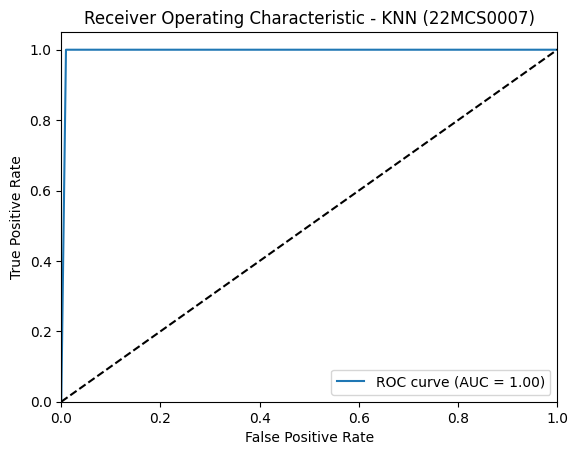

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_KNN)

# Calculate the area under the ROC curve
auc = roc_auc_score(y_test, y_pred_KNN)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - KNN (22MCS0007)')
plt.legend(loc='lower right')
plt.show()


**2. Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from math import sqrt

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are the training and testing data

# Instantiate the Naive Bayes classifier
nb = GaussianNB()

# Fit the model on the training data
nb.fit(X_train_pca, y_train)

# Predict on the testing data
y_pred_nb = nb.predict(X_test_pca)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy_nb)

# Calculate F1 score
f1_score_nb = f1_score(y_test, y_pred_nb, average='macro')
print("F1 Score:", f1_score_nb)

# Calculate precision
precision_nb = precision_score(y_test, y_pred_nb, average='macro')
print("Precision:", precision_nb)

# Calculate mean squared error
mse_nb = mean_squared_error(y_test, y_pred_nb)
print("Mean Squared Error:", mse_nb)

# Calculate root mean squared error
rmse_nb = sqrt(mse_nb)
print("Root Mean Squared Error:", rmse_nb)

# Calculate mean absolute error
mae_nb = mean_absolute_error(y_test, y_pred_nb)
print("Mean Absolute Error:", mae_nb)


Accuracy: 0.8873846153846154
F1 Score: 0.8864426565487504
Precision: 0.8928869807379902
Mean Squared Error: 0.11261538461538462
Root Mean Squared Error: 0.33558215777270495
Mean Absolute Error: 0.11261538461538462


Report of model

In [ ]:
report_nb = classification_report(y_test, y_pred_nb)
print(report_nb)

              precision    recall  f1-score   support

           0       0.85      0.94      0.90       843
           1       0.93      0.83      0.88       782

    accuracy                           0.89      1625
   macro avg       0.89      0.89      0.89      1625
weighted avg       0.89      0.89      0.89      1625



ROC Curve

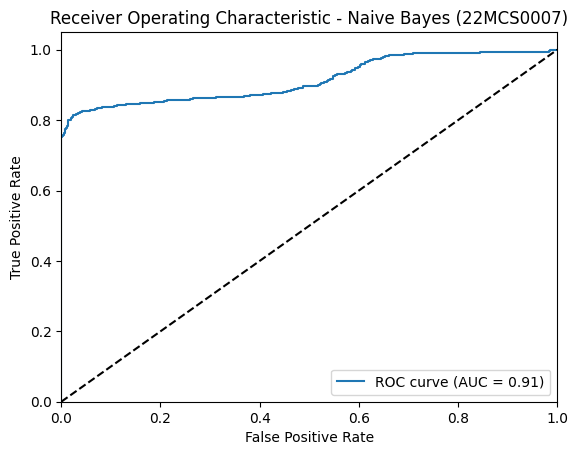

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming 'y_test' contains the true labels and 'y_pred_prob' contains the predicted probabilities

# Calculate the predicted probabilities for the positive class
y_pred_prob_nb = nb.predict_proba(X_test_pca)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)

# Calculate the area under the ROC curve
auc_nb = roc_auc_score(y_test, y_pred_prob_nb)

# Plot the ROC curve
plt.plot(fpr_nb, tpr_nb, label='ROC curve (AUC = %0.2f)' % auc_nb)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Naive Bayes (22MCS0007)')
plt.legend(loc='lower right')
plt.show()


**3. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error, f1_score, precision_score
from math import sqrt

# Instantiate the Random Forest classifier
rf = RandomForestClassifier(n_estimators=1)

# Fit the model on the training data
rf.fit(X_train_pca, y_train)

# Predict on the testing data
y_pred_rf = rf.predict(X_test_pca)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

# Calculate F1 score
f1_score_rf = f1_score(y_test, y_pred_rf, average='macro')
print("F1 Score:", f1_score_rf)

# Calculate precision
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
print("Precision:", precision_rf)

# Calculate mean squared error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error:", mse_rf)

# Calculate root mean squared error
rmse_rf = sqrt(mse_rf)
print("Root Mean Squared Error:", rmse_rf)

# Calculate mean absolute error
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print("Mean Absolute Error:", mae_rf)


Accuracy: 0.9889230769230769
F1 Score: 0.988906402655485
Precision: 0.9889546351084813
Mean Squared Error: 0.011076923076923076
Root Mean Squared Error: 0.10524696231684351
Mean Absolute Error: 0.011076923076923076


Report of model


In [ ]:
report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       843
           1       0.99      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



ROC Curve

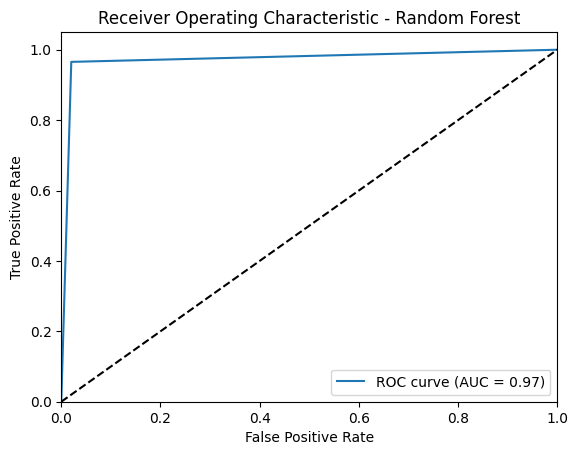

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the predicted probabilities for the positive class
y_pred_prob_rf = rf.predict_proba(X_test_pca)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)

# Calculate the area under the ROC curve
auc = roc_auc_score(y_test, y_pred_prob_rf)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc='lower right')
plt.show()


**4. Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error
from math import sqrt

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are the training and testing data

# Instantiate the Decision Tree classifier
dt = DecisionTreeClassifier()

# Fit the model on the training data
dt.fit(X_train_pca, y_train)

# Predict on the testing data
y_pred_dt = dt.predict(X_test_pca)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)

# Calculate F1 score
f1_score_dt = f1_score(y_test, y_pred_dt, average='macro')
print("F1 Score:", f1_score_dt)

# Calculate precision
precision_dt = precision_score(y_test, y_pred_dt, average='macro')
print("Precision:", precision_dt)

# Calculate mean squared error
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("Mean Squared Error:", mse_dt)

# Calculate root mean squared error
rmse_dt = sqrt(mse_dt)
print("Root Mean Squared Error:", rmse_dt)

# Calculate mean absolute error
mae_dt = mean_absolute_error(y_test, y_pred_dt)
print("Mean Absolute Error:", mae_dt)


Accuracy: 0.9963076923076923
F1 Score: 0.996302134218495
Precision: 0.9963510848126234
Mean Squared Error: 0.0036923076923076922
Root Mean Squared Error: 0.060764362025019995
Mean Absolute Error: 0.0036923076923076922


Report of model

In [ ]:
report_dt = classification_report(y_test, y_pred_dt)
print(report_dt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      0.99      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



ROC Curve

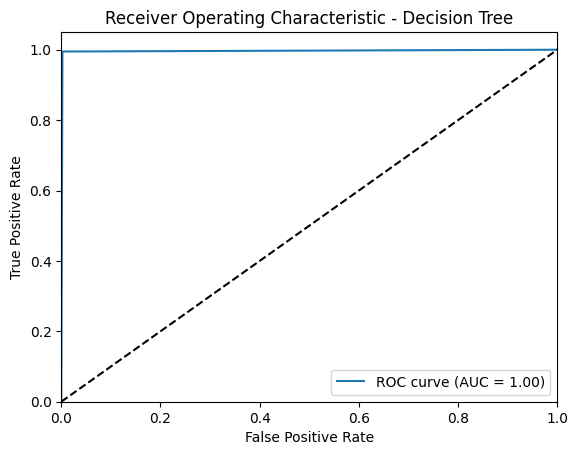

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are the training and testing data

# Instantiate the Decision Tree classifier
dt = DecisionTreeClassifier()

# Fit the model on the training data
dt.fit(X_train_pca, y_train)

# Predict probabilities for the positive class
y_pred_proba = dt.predict_proba(X_test_pca)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.legend(loc='lower right')
plt.show()


Visualizing **Accuracy** of different models

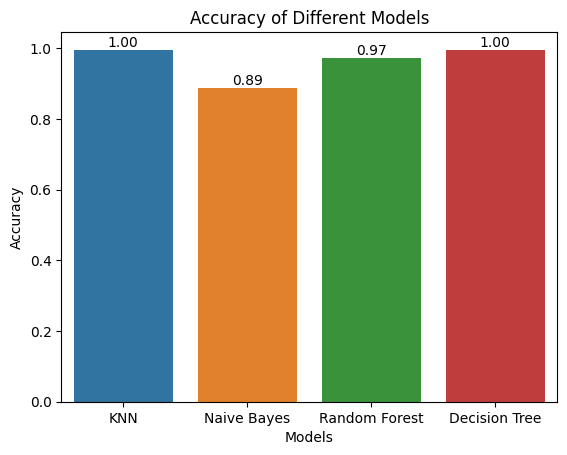

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have computed the accuracy scores for each model
accuracy_scores = [accuracy_KNN, accuracy_nb, accuracy_rf, accuracy_dt]
models = ['KNN', 'Naive Bayes', 'Random Forest', 'Decision Tree']

# Plot the accuracy scores
sns.barplot(x=models, y=accuracy_scores)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')

# Add value labels to the bars
for i, v in enumerate(accuracy_scores):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')

# Display the plot
plt.show()


Visualizing **Precision** of different models

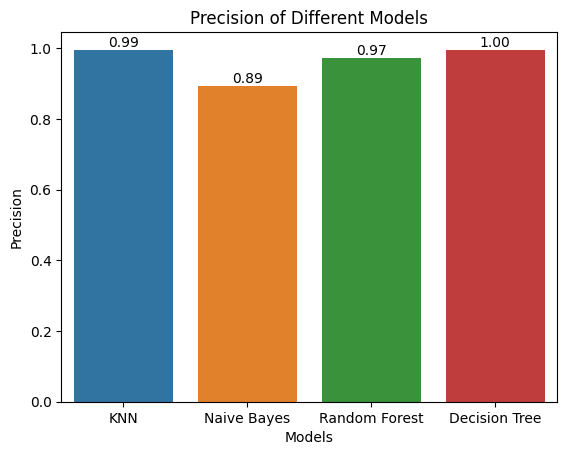

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have computed the precision scores for each model
precision_scores = [precision_KNN, precision_nb, precision_rf, precision_dt]
models = ['KNN', 'Naive Bayes', 'Random Forest', 'Decision Tree']

# Create a bar plot using Seaborn
sns.barplot(x=models, y=precision_scores)
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision of Different Models')

# Add value labels to the bars
for i, v in enumerate(precision_scores):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')

# Display the plot
plt.show()


Visualizing **MSE** of different models

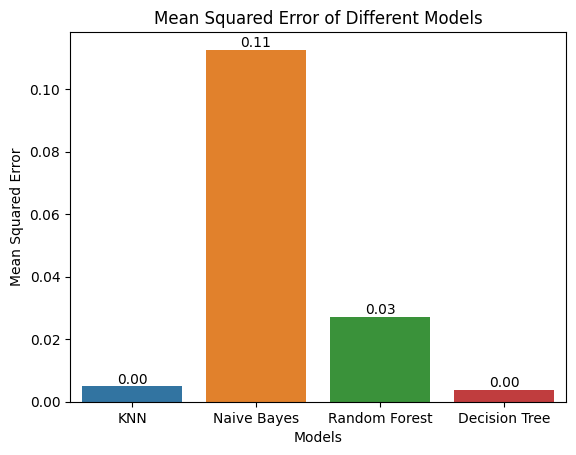

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have computed the MSE for each model
mse_scores = [mse_KNN, mse_nb, mse_rf, mse_dt]
models = ['KNN', 'Naive Bayes', 'Random Forest', 'Decision Tree']

# Create a bar plot using Seaborn
sns.barplot(x=models, y=mse_scores)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error of Different Models')

# Add value labels to the bars
for i, v in enumerate(mse_scores):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')

# Display the plot
plt.show()


Visualizing **RMSE** of different models

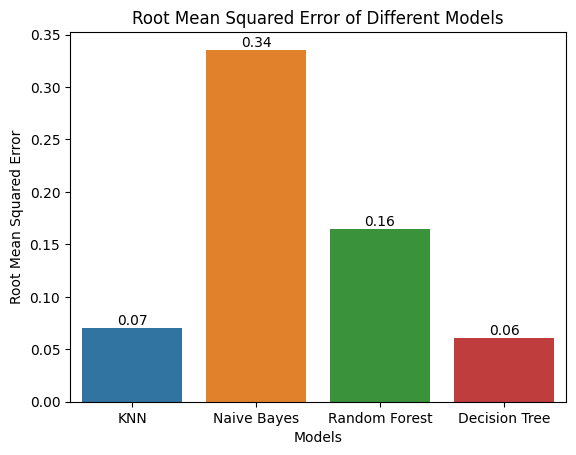

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have computed the RMSE for each model
rmse_scores = [rmse_KNN, rmse_nb, rmse_rf, rmse_dt]
models = ['KNN', 'Naive Bayes', 'Random Forest', 'Decision Tree']

# Create a bar plot using Seaborn
sns.barplot(x=models, y=rmse_scores)
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error of Different Models')

# Add value labels to the bars
for i, v in enumerate(rmse_scores):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')

# Display the plot
plt.show()


Visualizing **MAE** of different models

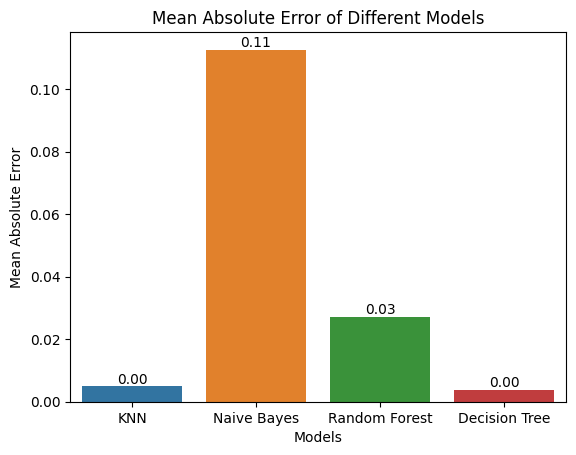

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have computed the MAE for each model
mae_scores = [mae_KNN, mae_nb, mae_rf, mae_dt]
models = ['KNN', 'Naive Bayes', 'Random Forest', 'Decision Tree']

# Create a bar plot using Seaborn
sns.barplot(x=models, y=mae_scores)
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error of Different Models')

# Add value labels to the bars
for i, v in enumerate(mae_scores):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')

# Display the plot
plt.show()
